In [2]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.lines as mlines
import scipy.constants as cs
import uncertainties
from uncertainties import ufloat
import math

$$S_{V_J} = \frac{V_J^2}{B_N} = 4 k T R_L$$
This is the equation that relations the resistance to the noise. We measured in the voltage noise spectral density which is $\sqrt{S_{V_J}}$ in nV/sqrt(Hz). We expect the resistance to be proportional to the noise squared, but we're not sure we see that. Thus we wanted to graph our data. We took our data after averaging 200 times at 3 different frequences for 8 different resistors

In [3]:
Resistances = [50, 100, 500, 1000, 5000, 10000, 50000, 100000]

def calculate_noise(r):
    return math.sqrt(r / 50) # given that noise at 50 ohms is around 1 nV

expected_noises = [calculate_noise(r) for r in Resistances] 

print(expected_noises)


[1.0, 1.4142135623730951, 3.1622776601683795, 4.47213595499958, 10.0, 14.142135623730951, 31.622776601683793, 44.721359549995796]


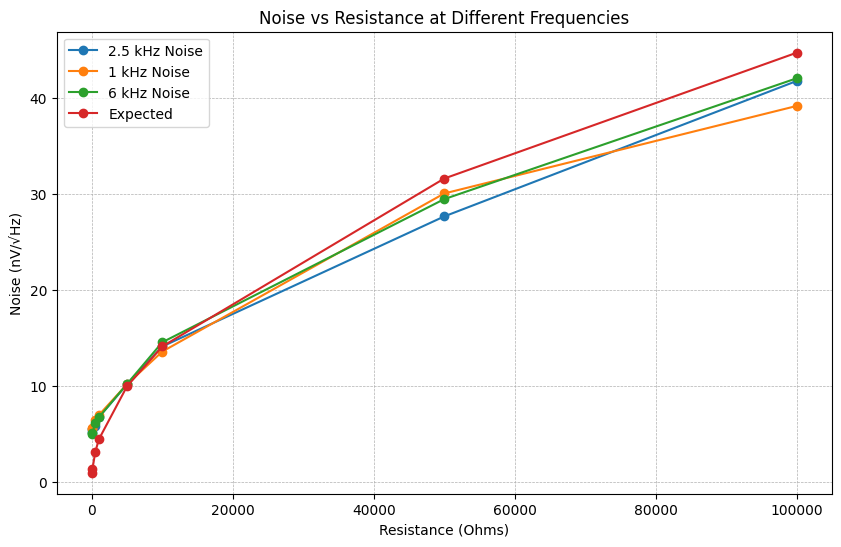

In [3]:
# Data
frequencies = [2.5, 1, 6]  # in kHz
resistances = [50, 100, 500, 1000, 5000, 10000, 50000, 100000]  # in Ohms
noise_1_kHz = [5.63,5.57, 6.48,7.00,10.21,13.61,30.07,39.18]
noise_2_5_kHz = [5.53,5.29,5.90,6.77,10.19,14.14,27.68,41.78]
noise_6_kHz = [4.99, 5.18, 6.15,6.77,10.24,14.58,29.48,42.06]
expected_noise = [1.0, 1.4142135623730951, 3.1622776601683795, 4.47213595499958, 10.0, 14.142135623730951, 31.622776601683793, 44.721359549995796]

# Plot
plt.figure(figsize=(10, 6))

plt.plot(resistances, noise_2_5_kHz, marker='o', label='2.5 kHz Noise')
plt.plot(resistances, noise_1_kHz, marker='o', label='1 kHz Noise')
plt.plot(resistances, noise_6_kHz, marker='o', label='6 kHz Noise')
plt.plot(resistances, expected_noise, marker='o', label='Expected')

# Log scale for resistances
plt.xscale('linear')

# Labels and title
plt.xlabel('Resistance (Ohms)')
plt.ylabel('Noise (nV/√Hz)')
plt.title('Noise vs Resistance at Different Frequencies')
plt.legend()

# Grid and show plot
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from uncertainties import ufloat
import matplotlib.ticker as mtick

plt.rcParams['text.usetex'] = True

DBlue = [x/256 for x in (4,87,172)]
LBlue = [x/256 for x in (48,143,172)]
BGreen = [x/256 for x in (55,189,121)]

resistances = np.array([50, 100, 500, 1000, 5000, 10000, 50000, 100000])
noise_1_kHz = np.array([5.63, 5.57, 6.48, 7.00, 10.21, 13.61, 30.07, 39.18])
noise_2_5_kHz = np.array([5.53, 5.29, 5.90, 6.77, 10.19, 14.14, 27.68, 41.78])
noise_6_kHz = np.array([4.99, 5.18, 6.15, 6.77, 10.24, 14.58, 29.48, 42.06])
uncertainty = 0.05

k = 1.380649e-23
T = 293
expected_noise = np.sqrt(4 * k * T * resistances) * 1e9

fig, ax = plt.subplots(figsize=(10, 8))

ax.errorbar(resistances, noise_1_kHz**2, yerr=2*noise_1_kHz*noise_1_kHz*uncertainty,
           fmt='o', color=DBlue, label='\\SI{1}{\\kilo\\hertz}', capsize=5, markersize=8)
ax.errorbar(resistances, noise_2_5_kHz**2, yerr=2*noise_2_5_kHz*noise_2_5_kHz*uncertainty,
           fmt='o', color=LBlue, label='\\SI{2.5}{\\kilo\\hertz}', capsize=5, markersize=8)
ax.errorbar(resistances, noise_6_kHz**2, yerr=2*noise_6_kHz*noise_6_kHz*uncertainty,
           fmt='o', color=BGreen, label='\\SI{6}{\\kilo\\hertz}', capsize=5, markersize=8)
ax.plot(resistances, expected_noise**2, '--', color='black', 
        label='Theoretical', linewidth=2)

# ax.set_xlabel(r'Resistance $R_L$ [$\Omega$]', fontsize=22, fontweight='bold')
# ax.set_ylabel(r'Power Spectral Density $S_V$ [nV$^2$/Hz]', fontsize=22, fontweight='bold')
# ax.tick_params(axis='both', which='major', labelsize=18, width=2, length=6)
# ax.grid(True, linestyle='--', alpha=0.5)
# ax.legend(fontsize=16, frameon=True)
# ax.set_xscale('log')
# ax.set_yscale('log')

slope = np.mean((noise_2_5_kHz**2)/(4*T*resistances))
k_experimental = slope * 1e-18
k_uncertainty = np.std((noise_2_5_kHz**2)/(4*T*resistances)) * 1e-18
k_measured = ufloat(k_experimental, k_uncertainty)

textstr = '\n'.join((
    r'$k_\mathrm{measured} = ' + f'{k_measured:.2uL}$ J/K',
    r'$k_\mathrm{actual} = 1.380649 \times 10^{-23}$ J/K',
    f'Error = {(k_experimental/1.380649e-23 - 1)*100:.1f}\\%'))

plt.figtext(0.02, 0.95, textstr, fontsize=16, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.savefig('johnson_noise.pdf', bbox_inches='tight', dpi=300)

RuntimeError: latex was not able to process the following string:
b'\\\\SI{1}{\\\\kilo\\\\hertz}'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpr45yesgg aaefd0977542ac96d4346d14d979a329.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.24 (MiKTeX 22.10) (preloaded format=latex.fmt)
 restricted \write18 enabled.
entering extended mode
(aaefd0977542ac96d4346d14d979a329.tex
LaTeX2e <2022-06-01> patch level 5
L3 programming layer <2022-09-28>
(C:\Users\alexa\AppData\Local\Programs\MiKTeX\tex/latex/base\article.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class
(C:\Users\alexa\AppData\Local\Programs\MiKTeX\tex/latex/base\size10.clo))
(C:\Users\alexa\AppData\Local\Programs\MiKTeX\tex/latex/type1cm\type1cm.sty)
(C:\Users\alexa\AppData\Local\Programs\MiKTeX\tex/latex/cm-super\type1ec.sty
(C:\Users\alexa\AppData\Local\Programs\MiKTeX\tex/latex/base\t1cmr.fd))
(C:\Users\alexa\AppData\Local\Programs\MiKTeX\tex/latex/base\inputenc.sty)
(C:\Users\alexa\AppData\Local\Programs\MiKTeX\tex/latex/geometry\geometry.sty
(C:\Users\alexa\AppData\Local\Programs\MiKTeX\tex/latex/graphics\keyval.sty)
(C:\Users\alexa\AppData\Local\Programs\MiKTeX\tex/generic/iftex\ifvtex.sty
(C:\Users\alexa\AppData\Local\Programs\MiKTeX\tex/generic/iftex\iftex.sty))
(C:\Users\alexa\AppData\Local\Programs\MiKTeX\tex/latex/geometry\geometry.cfg))

(C:\Users\alexa\AppData\Local\Programs\MiKTeX\tex/latex/underscore\underscore.s
ty) (C:\Users\alexa\AppData\Local\Programs\MiKTeX\tex/latex/base\textcomp.sty)
(C:\Users\alexa\AppData\Local\Programs\MiKTeX\tex/latex/l3backend\l3backend-dvi
ps.def)
No file aaefd0977542ac96d4346d14d979a329.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Undefined control sequence.
l.29 {\sffamily \SI
                   {1}{\kilo\hertz}}%
No pages of output.
Transcript written on C:\Users\alexa\.matplotlib\tex.cache\aa\ef\tmpr45yesgg\aa
efd0977542ac96d4346d14d979a329.log.




Error in callback <function _draw_all_if_interactive at 0x000002C6C8E5BF60> (for post_execute), with arguments args (),kwargs {}:


RuntimeError: latex was not able to process the following string:
b'\\\\SI{1}{\\\\kilo\\\\hertz}'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpnnp4c8cj aaefd0977542ac96d4346d14d979a329.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.24 (MiKTeX 22.10) (preloaded format=latex.fmt)
 restricted \write18 enabled.
entering extended mode
(aaefd0977542ac96d4346d14d979a329.tex
LaTeX2e <2022-06-01> patch level 5
L3 programming layer <2022-09-28>
(C:\Users\alexa\AppData\Local\Programs\MiKTeX\tex/latex/base\article.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class
(C:\Users\alexa\AppData\Local\Programs\MiKTeX\tex/latex/base\size10.clo))
(C:\Users\alexa\AppData\Local\Programs\MiKTeX\tex/latex/type1cm\type1cm.sty)
(C:\Users\alexa\AppData\Local\Programs\MiKTeX\tex/latex/cm-super\type1ec.sty
(C:\Users\alexa\AppData\Local\Programs\MiKTeX\tex/latex/base\t1cmr.fd))
(C:\Users\alexa\AppData\Local\Programs\MiKTeX\tex/latex/base\inputenc.sty)
(C:\Users\alexa\AppData\Local\Programs\MiKTeX\tex/latex/geometry\geometry.sty
(C:\Users\alexa\AppData\Local\Programs\MiKTeX\tex/latex/graphics\keyval.sty)
(C:\Users\alexa\AppData\Local\Programs\MiKTeX\tex/generic/iftex\ifvtex.sty
(C:\Users\alexa\AppData\Local\Programs\MiKTeX\tex/generic/iftex\iftex.sty))
(C:\Users\alexa\AppData\Local\Programs\MiKTeX\tex/latex/geometry\geometry.cfg))

(C:\Users\alexa\AppData\Local\Programs\MiKTeX\tex/latex/underscore\underscore.s
ty) (C:\Users\alexa\AppData\Local\Programs\MiKTeX\tex/latex/base\textcomp.sty)
(C:\Users\alexa\AppData\Local\Programs\MiKTeX\tex/latex/l3backend\l3backend-dvi
ps.def)
No file aaefd0977542ac96d4346d14d979a329.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Undefined control sequence.
l.29 {\sffamily \SI
                   {1}{\kilo\hertz}}%
No pages of output.
Transcript written on C:\Users\alexa\.matplotlib\tex.cache\aa\ef\tmpnnp4c8cj\aa
efd0977542ac96d4346d14d979a329.log.




$$ slope = 4 k_b T$$

In [6]:
0.016*10**(-9)/4/293

1.3651877133105804e-14

1 kHz Noise Squared Fit: slope = 0.01571+/-0.00032 , intercept = 31.4+/-2.9
2.5 kHz Noise Squared Fit: slope = 0.01633+/-0.00033 , intercept = 27.4+/-2.8
6 kHz Noise Squared Fit: slope = 0.01728+/-0.00034 , intercept = 26.0+/-2.7


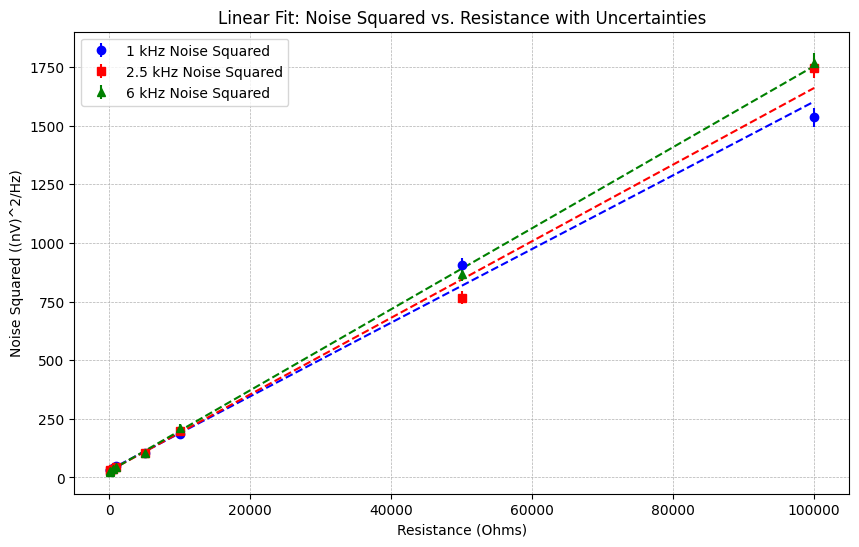

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from uncertainties import ufloat
import uncertainties.unumpy as unp

# Data
resistances = np.array([50, 100, 500, 1000, 5000, 10000, 50000, 100000])  # in Ohms

# Noise measurements (in nV/√Hz) for three frequencies
noise_1_kHz   = np.array([5.63, 5.57, 6.48, 7.00, 10.21, 13.61, 30.07, 39.18])
noise_2_5_kHz = np.array([5.53, 5.29, 5.90, 6.77, 10.19, 14.14, 27.68, 41.78])
noise_6_kHz   = np.array([4.99, 5.18, 6.15, 6.77, 10.24, 14.58, 29.48, 42.06])

# Each unsquared noise measurement has an uncertainty of 0.5
noise_err = 0.5

# Create ufloats for each noise measurement
noise1 = np.array([ufloat(val, noise_err) for val in noise_1_kHz])
noise2_5 = np.array([ufloat(val, noise_err) for val in noise_2_5_kHz])
noise6 = np.array([ufloat(val, noise_err) for val in noise_6_kHz])

# Compute noise squared values (the uncertainties will be propagated automatically)
noise_sq_1   = noise1**2
noise_sq_2_5 = noise2_5**2
noise_sq_6   = noise6**2

# Extract nominal values and standard deviations for noise squared
noise_sq_1_nom = unp.nominal_values(noise_sq_1)
noise_sq_1_std = unp.std_devs(noise_sq_1)

noise_sq_2_5_nom = unp.nominal_values(noise_sq_2_5)
noise_sq_2_5_std = unp.std_devs(noise_sq_2_5)

noise_sq_6_nom = unp.nominal_values(noise_sq_6)
noise_sq_6_std = unp.std_devs(noise_sq_6)

# Define a linear model for the fit: noise_sq = slope * Resistance + intercept
def linear_model(x, m, c):
    return m * x + c

# Perform weighted linear regression using curve_fit (with sigma as the standard deviations)
popt1, pcov1 = curve_fit(linear_model, resistances, noise_sq_1_nom, sigma=noise_sq_1_std, absolute_sigma=True)
popt2_5, pcov2_5 = curve_fit(linear_model, resistances, noise_sq_2_5_nom, sigma=noise_sq_2_5_std, absolute_sigma=True)
popt6, pcov6 = curve_fit(linear_model, resistances, noise_sq_6_nom, sigma=noise_sq_6_std, absolute_sigma=True)

# Create ufloats for the fit parameters (slope and intercept)
slope1    = ufloat(popt1[0], np.sqrt(pcov1[0, 0]))
intercept1= ufloat(popt1[1], np.sqrt(pcov1[1, 1]))

slope2_5    = ufloat(popt2_5[0], np.sqrt(pcov2_5[0, 0]))
intercept2_5= ufloat(popt2_5[1], np.sqrt(pcov2_5[1, 1]))

slope6    = ufloat(popt6[0], np.sqrt(pcov6[0, 0]))
intercept6= ufloat(popt6[1], np.sqrt(pcov6[1, 1]))

print("1 kHz Noise Squared Fit: slope =", slope1, ", intercept =", intercept1)
print("2.5 kHz Noise Squared Fit: slope =", slope2_5, ", intercept =", intercept2_5)
print("6 kHz Noise Squared Fit: slope =", slope6, ", intercept =", intercept6)

# Create best-fit lines using the fit parameters
fit_line_1   = linear_model(resistances, popt1[0], popt1[1])
fit_line_2_5 = linear_model(resistances, popt2_5[0], popt2_5[1])
fit_line_6   = linear_model(resistances, popt6[0], popt6[1])

# Plot the data with error bars and the fitted lines
plt.figure(figsize=(10, 6))

plt.errorbar(resistances, noise_sq_1_nom, yerr=noise_sq_1_std, fmt='o', label="1 kHz Noise Squared", color='blue')
plt.plot(resistances, fit_line_1, '--', color='blue')

plt.errorbar(resistances, noise_sq_2_5_nom, yerr=noise_sq_2_5_std, fmt='s', label="2.5 kHz Noise Squared", color='red')
plt.plot(resistances, fit_line_2_5, '--', color='red')

plt.errorbar(resistances, noise_sq_6_nom, yerr=noise_sq_6_std, fmt='^', label="6 kHz Noise Squared", color='green')
plt.plot(resistances, fit_line_6, '--', color='green')

plt.xlabel("Resistance (Ohms)")
plt.ylabel("Noise Squared ((nV)^2/Hz)")
plt.title("Linear Fit: Noise Squared vs. Resistance with Uncertainties")
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()


1 kHz Noise Squared Fit: slope = 0.01571+/-0.00032 , intercept = 31.4+/-2.9
2.5 kHz Noise Squared Fit: slope = 0.01633+/-0.00033 , intercept = 27.4+/-2.8
6 kHz Noise Squared Fit: slope = 0.01728+/-0.00034 , intercept = 26.0+/-2.7


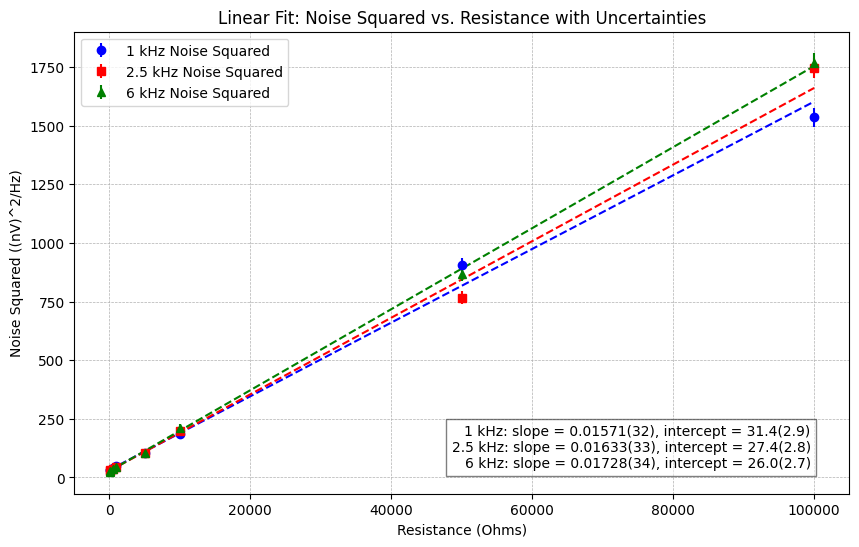

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from uncertainties import ufloat
import uncertainties.unumpy as unp

# Data
resistances = np.array([50, 100, 500, 1000, 5000, 10000, 50000, 100000])  # in Ohms

# Noise measurements (in nV/√Hz) for three frequencies
noise_1_kHz   = np.array([5.63, 5.57, 6.48, 7.00, 10.21, 13.61, 30.07, 39.18])
noise_2_5_kHz = np.array([5.53, 5.29, 5.90, 6.77, 10.19, 14.14, 27.68, 41.78])
noise_6_kHz   = np.array([4.99, 5.18, 6.15, 6.77, 10.24, 14.58, 29.48, 42.06])

# Each unsquared noise measurement has an uncertainty of 0.5
noise_err = 0.5

# Create ufloats for each noise measurement
noise1   = np.array([ufloat(val, noise_err) for val in noise_1_kHz])
noise2_5 = np.array([ufloat(val, noise_err) for val in noise_2_5_kHz])
noise6   = np.array([ufloat(val, noise_err) for val in noise_6_kHz])

# Compute noise squared values (the uncertainties will be propagated automatically)
noise_sq_1   = noise1**2
noise_sq_2_5 = noise2_5**2
noise_sq_6   = noise6**2

# Extract nominal values and standard deviations for noise squared
noise_sq_1_nom = unp.nominal_values(noise_sq_1)
noise_sq_1_std = unp.std_devs(noise_sq_1)

noise_sq_2_5_nom = unp.nominal_values(noise_sq_2_5)
noise_sq_2_5_std = unp.std_devs(noise_sq_2_5)

noise_sq_6_nom = unp.nominal_values(noise_sq_6)
noise_sq_6_std = unp.std_devs(noise_sq_6)

# Define a linear model for the fit: noise_sq = slope * Resistance + intercept
def linear_model(x, m, c):
    return m * x + c

# Perform weighted linear regression using curve_fit (with sigma as the standard deviations)
popt1, pcov1    = curve_fit(linear_model, resistances, noise_sq_1_nom, sigma=noise_sq_1_std, absolute_sigma=True)
popt2_5, pcov2_5 = curve_fit(linear_model, resistances, noise_sq_2_5_nom, sigma=noise_sq_2_5_std, absolute_sigma=True)
popt6, pcov6    = curve_fit(linear_model, resistances, noise_sq_6_nom, sigma=noise_sq_6_std, absolute_sigma=True)

# Create ufloats for the fit parameters (slope and intercept)
slope1      = ufloat(popt1[0], np.sqrt(pcov1[0, 0]))
intercept1  = ufloat(popt1[1], np.sqrt(pcov1[1, 1]))

slope2_5      = ufloat(popt2_5[0], np.sqrt(pcov2_5[0, 0]))
intercept2_5  = ufloat(popt2_5[1], np.sqrt(pcov2_5[1, 1]))

slope6      = ufloat(popt6[0], np.sqrt(pcov6[0, 0]))
intercept6  = ufloat(popt6[1], np.sqrt(pcov6[1, 1]))

print("1 kHz Noise Squared Fit: slope =", slope1, ", intercept =", intercept1)
print("2.5 kHz Noise Squared Fit: slope =", slope2_5, ", intercept =", intercept2_5)
print("6 kHz Noise Squared Fit: slope =", slope6, ", intercept =", intercept6)

# Create best-fit lines using the fit parameters
fit_line_1   = linear_model(resistances, popt1[0], popt1[1])
fit_line_2_5 = linear_model(resistances, popt2_5[0], popt2_5[1])
fit_line_6   = linear_model(resistances, popt6[0], popt6[1])

# Plot the data with error bars and the fitted lines
plt.figure(figsize=(10, 6))

plt.errorbar(resistances, noise_sq_1_nom, yerr=noise_sq_1_std, fmt='o', label="1 kHz Noise Squared", color='blue')
plt.plot(resistances, fit_line_1, '--', color='blue')

plt.errorbar(resistances, noise_sq_2_5_nom, yerr=noise_sq_2_5_std, fmt='s', label="2.5 kHz Noise Squared", color='red')
plt.plot(resistances, fit_line_2_5, '--', color='red')

plt.errorbar(resistances, noise_sq_6_nom, yerr=noise_sq_6_std, fmt='^', label="6 kHz Noise Squared", color='green')
plt.plot(resistances, fit_line_6, '--', color='green')

plt.xlabel("Resistance (Ohms)")
plt.ylabel("Noise Squared ((nV)^2/Hz)")
plt.title("Linear Fit: Noise Squared vs. Resistance with Uncertainties")
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)

# Create a multi-line string for the fit parameters using value(uncertainty) formatting.
textstr = '\n'.join((
    '1 kHz: slope = ' + f'{slope1:S}' + ', intercept = ' + f'{intercept1:S}',
    '2.5 kHz: slope = ' + f'{slope2_5:S}' + ', intercept = ' + f'{intercept2_5:S}',
    '6 kHz: slope = ' + f'{slope6:S}' + ', intercept = ' + f'{intercept6:S}'
))

# Add the text box to the bottom right of the graph.
plt.text(0.95, 0.05, textstr, transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='bottom', horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.5))

plt.show()


1 kHz Noise Squared Fit: slope = 0.01571+/-0.00032 , intercept = 31.4+/-2.9
2.5 kHz Noise Squared Fit: slope = 0.01633+/-0.00033 , intercept = 27.4+/-2.8
6 kHz Noise Squared Fit: slope = 0.01728+/-0.00034 , intercept = 26.0+/-2.7
k_1 = (1.341+/-0.028)e-23
k_2_5 = (1.394+/-0.028)e-23
k_6 = (1.475+/-0.029)e-23


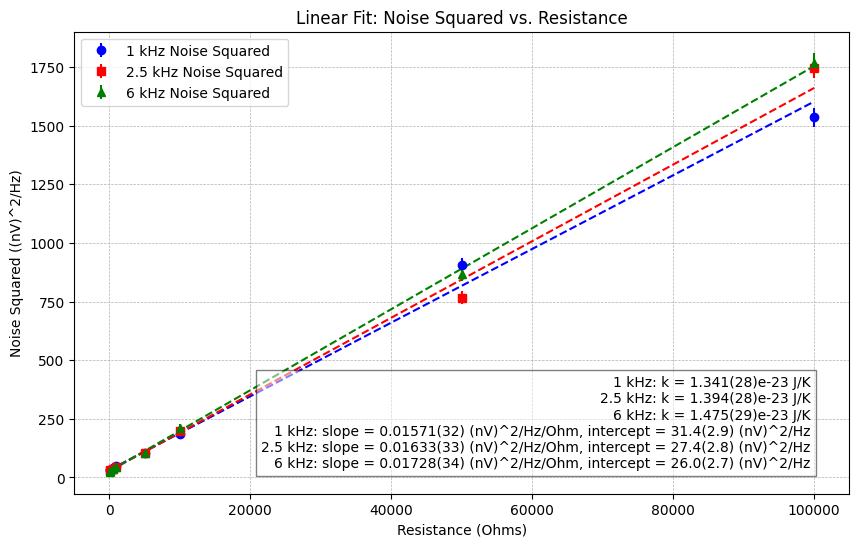

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from uncertainties import ufloat
import uncertainties.unumpy as unp

# Data
resistances = np.array([50, 100, 500, 1000, 5000, 10000, 50000, 100000])  # in Ohms

# Noise measurements (in nV/√Hz) for three frequencies
noise_1_kHz   = np.array([5.63, 5.57, 6.48, 7.00, 10.21, 13.61, 30.07, 39.18])
noise_2_5_kHz = np.array([5.53, 5.29, 5.90, 6.77, 10.19, 14.14, 27.68, 41.78])
noise_6_kHz   = np.array([4.99, 5.18, 6.15, 6.77, 10.24, 14.58, 29.48, 42.06])

# Each unsquared noise measurement has an uncertainty of 0.5
noise_err = 0.5

# Create ufloats for each noise measurement
noise1   = np.array([ufloat(val, noise_err) for val in noise_1_kHz])
noise2_5 = np.array([ufloat(val, noise_err) for val in noise_2_5_kHz])
noise6   = np.array([ufloat(val, noise_err) for val in noise_6_kHz])

# Compute noise squared values (the uncertainties will be propagated automatically)
noise_sq_1   = noise1 ** 2
noise_sq_2_5 = noise2_5 ** 2
noise_sq_6   = noise6 ** 2

# Extract nominal values and standard deviations for noise squared
noise_sq_1_nom = unp.nominal_values(noise_sq_1)
noise_sq_1_std = unp.std_devs(noise_sq_1)

noise_sq_2_5_nom = unp.nominal_values(noise_sq_2_5)
noise_sq_2_5_std = unp.std_devs(noise_sq_2_5)

noise_sq_6_nom = unp.nominal_values(noise_sq_6)
noise_sq_6_std = unp.std_devs(noise_sq_6)

# Define a linear model for the fit: noise_sq = slope * Resistance + intercept
def linear_model(x, m, c):
    return m * x + c

# Perform weighted linear regression using curve_fit (with sigma as the standard deviations)
popt1, pcov1    = curve_fit(linear_model, resistances, noise_sq_1_nom,
                             sigma=noise_sq_1_std, absolute_sigma=True)
popt2_5, pcov2_5 = curve_fit(linear_model, resistances, noise_sq_2_5_nom,
                             sigma=noise_sq_2_5_std, absolute_sigma=True)
popt6, pcov6    = curve_fit(linear_model, resistances, noise_sq_6_nom,
                             sigma=noise_sq_6_std, absolute_sigma=True)

# Create ufloats for the fit parameters (slope and intercept)
slope1     = ufloat(popt1[0], np.sqrt(pcov1[0, 0]))
intercept1 = ufloat(popt1[1], np.sqrt(pcov1[1, 1]))

slope2_5     = ufloat(popt2_5[0], np.sqrt(pcov2_5[0, 0]))
intercept2_5 = ufloat(popt2_5[1], np.sqrt(pcov2_5[1, 1]))

slope6     = ufloat(popt6[0], np.sqrt(pcov6[0, 0]))
intercept6 = ufloat(popt6[1], np.sqrt(pcov6[1, 1]))

print("1 kHz Noise Squared Fit: slope =", slope1, ", intercept =", intercept1)
print("2.5 kHz Noise Squared Fit: slope =", slope2_5, ", intercept =", intercept2_5)
print("6 kHz Noise Squared Fit: slope =", slope6, ", intercept =", intercept6)

# Conversion: divide by (4*293) and multiply by 1e-9
# This is equivalent to: conversion_factor = 1e-18 / (4 * 293)
conversion_factor = 1e-18 / (4 * 293)
k_1   = slope1 * conversion_factor
k_2_5 = slope2_5 * conversion_factor
k_6   = slope6 * conversion_factor

print("k_1 =", k_1)
print("k_2_5 =", k_2_5)
print("k_6 =", k_6)

# Create best-fit lines using the fit parameters
fit_line_1   = linear_model(resistances, popt1[0], popt1[1])
fit_line_2_5 = linear_model(resistances, popt2_5[0], popt2_5[1])
fit_line_6   = linear_model(resistances, popt6[0], popt6[1])

# Plot the data with error bars and the fitted lines
plt.figure(figsize=(10, 6))

plt.errorbar(resistances, noise_sq_1_nom, yerr=noise_sq_1_std,
             fmt='o', label="1 kHz Noise Squared", color='blue')
plt.plot(resistances, fit_line_1, '--', color='blue')

plt.errorbar(resistances, noise_sq_2_5_nom, yerr=noise_sq_2_5_std,
             fmt='s', label="2.5 kHz Noise Squared", color='red')
plt.plot(resistances, fit_line_2_5, '--', color='red')

plt.errorbar(resistances, noise_sq_6_nom, yerr=noise_sq_6_std,
             fmt='^', label="6 kHz Noise Squared", color='green')
plt.plot(resistances, fit_line_6, '--', color='green')

plt.xlabel("Resistance (Ohms)")
plt.ylabel("Noise Squared ((nV)^2/Hz)")
plt.title("Linear Fit: Noise Squared vs. Resistance")
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)

# Create a multi-line string for the k values using value(uncertainty) formatting.
textstr = '\n'.join((
    '1 kHz: k = ' + f'{k_1:S}' + ' J/K',
    '2.5 kHz: k = ' + f'{k_2_5:S}'+ ' J/K',
    '6 kHz: k = ' + f'{k_6:S}'+ ' J/K',
    '1 kHz: slope = ' + f'{slope1:S}' + ' (nV)^2/Hz/Ohm' + ', intercept = ' + f'{intercept1:S}'+ ' (nV)^2/Hz',
    '2.5 kHz: slope = ' + f'{slope2_5:S}' + ' (nV)^2/Hz/Ohm'+ ', intercept = ' + f'{intercept2_5:S}'+ ' (nV)^2/Hz',
    '6 kHz: slope = ' + f'{slope6:S}' + ' (nV)^2/Hz/Ohm'+ ', intercept = ' + f'{intercept6:S}'+ ' (nV)^2/Hz'
    
))

# Add the text box to the bottom right of the graph.
plt.text(0.95, 0.05, textstr, transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='bottom', horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.5))

plt.show()


In [8]:
# Conversion: divide by (4*293) and multiply by 1e-9
conversion_factor = 1e-18 / (4 * 293)

k_1   = slope1 * conversion_factor
k_2_5 = slope2_5 * conversion_factor
k_6   = slope6 * conversion_factor

print("k_1 =", k_1)
print("k_2_5 =", k_2_5)
print("k_6 =", k_6)


k_1 = (1.341+/-0.028)e-23
k_2_5 = (1.394+/-0.028)e-23
k_6 = (1.475+/-0.029)e-23


In [9]:
# Compute the average of the three k-values
average_k = (k_1 + k_2_5 + k_6) / 3

# Print the average with its uncertainty
print("Average k =", average_k)


Average k = (1.403+/-0.016)e-23


In [10]:
popt1

array([1.57145577e-02, 3.14377303e+01])

In [18]:
403-16

387

1 kHz Noise Squared Fit: slope = 0.01571+/-0.00032 , intercept = 31.4+/-2.9
2.5 kHz Noise Squared Fit: slope = 0.01633+/-0.00033 , intercept = 27.4+/-2.8
6 kHz Noise Squared Fit: slope = 0.01728+/-0.00034 , intercept = 26.0+/-2.7
k_1 = (1.341+/-0.028)e-23
k_2_5 = (1.394+/-0.028)e-23
k_6 = (1.475+/-0.029)e-23


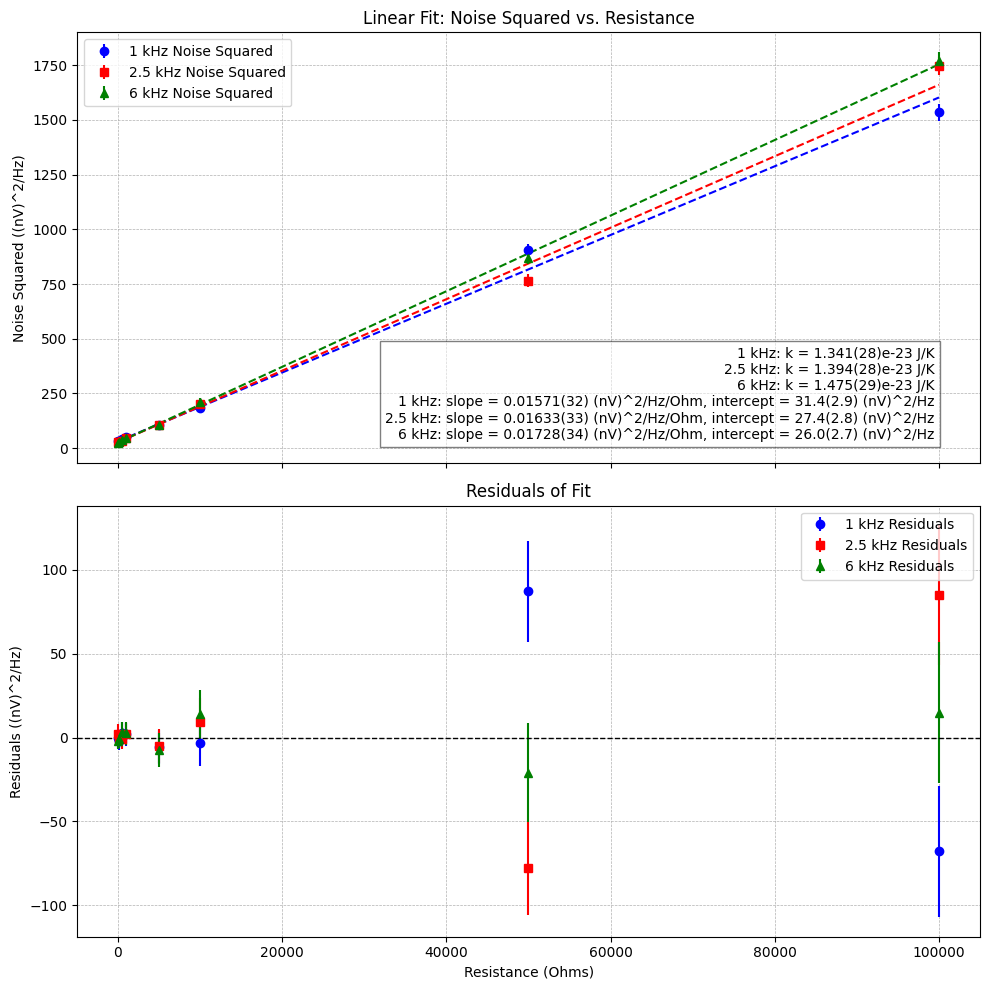

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from uncertainties import ufloat
import uncertainties.unumpy as unp

# Data
resistances = np.array([50, 100, 500, 1000, 5000, 10000, 50000, 100000])  # in Ohms

# Noise measurements (in nV/√Hz) for three frequencies
noise_1_kHz   = np.array([5.63, 5.57, 6.48, 7.00, 10.21, 13.61, 30.07, 39.18])
noise_2_5_kHz = np.array([5.53, 5.29, 5.90, 6.77, 10.19, 14.14, 27.68, 41.78])
noise_6_kHz   = np.array([4.99, 5.18, 6.15, 6.77, 10.24, 14.58, 29.48, 42.06])

# Each unsquared noise measurement has an uncertainty of 0.5
noise_err = 0.5

# Create ufloats for each noise measurement
noise1   = np.array([ufloat(val, noise_err) for val in noise_1_kHz])
noise2_5 = np.array([ufloat(val, noise_err) for val in noise_2_5_kHz])
noise6   = np.array([ufloat(val, noise_err) for val in noise_6_kHz])

# Compute noise squared values (the uncertainties are propagated automatically)
noise_sq_1   = noise1 ** 2
noise_sq_2_5 = noise2_5 ** 2
noise_sq_6   = noise6 ** 2

# Extract nominal values and standard deviations for noise squared
noise_sq_1_nom = unp.nominal_values(noise_sq_1)
noise_sq_1_std = unp.std_devs(noise_sq_1)

noise_sq_2_5_nom = unp.nominal_values(noise_sq_2_5)
noise_sq_2_5_std = unp.std_devs(noise_sq_2_5)

noise_sq_6_nom = unp.nominal_values(noise_sq_6)
noise_sq_6_std = unp.std_devs(noise_sq_6)

# Define a linear model for the fit: noise_sq = slope * Resistance + intercept
def linear_model(x, m, c):
    return m * x + c

# Perform weighted linear regression using curve_fit
popt1, pcov1    = curve_fit(linear_model, resistances, noise_sq_1_nom,
                             sigma=noise_sq_1_std, absolute_sigma=True)
popt2_5, pcov2_5 = curve_fit(linear_model, resistances, noise_sq_2_5_nom,
                             sigma=noise_sq_2_5_std, absolute_sigma=True)
popt6, pcov6    = curve_fit(linear_model, resistances, noise_sq_6_nom,
                             sigma=noise_sq_6_std, absolute_sigma=True)

# Create ufloats for the fit parameters (slope and intercept)
slope1     = ufloat(popt1[0], np.sqrt(pcov1[0, 0]))
intercept1 = ufloat(popt1[1], np.sqrt(pcov1[1, 1]))

slope2_5     = ufloat(popt2_5[0], np.sqrt(pcov2_5[0, 0]))
intercept2_5 = ufloat(popt2_5[1], np.sqrt(pcov2_5[1, 1]))

slope6     = ufloat(popt6[0], np.sqrt(pcov6[0, 0]))
intercept6 = ufloat(popt6[1], np.sqrt(pcov6[1, 1]))

print("1 kHz Noise Squared Fit: slope =", slope1, ", intercept =", intercept1)
print("2.5 kHz Noise Squared Fit: slope =", slope2_5, ", intercept =", intercept2_5)
print("6 kHz Noise Squared Fit: slope =", slope6, ", intercept =", intercept6)

# Conversion: divide by (4*293) and multiply by 1e-9
conversion_factor = 1e-18 / (4 * 293)
k_1   = slope1 * conversion_factor
k_2_5 = slope2_5 * conversion_factor
k_6   = slope6 * conversion_factor

print("k_1 =", k_1)
print("k_2_5 =", k_2_5)
print("k_6 =", k_6)

# Create best-fit lines using the fit parameters
fit_line_1   = linear_model(resistances, popt1[0], popt1[1])
fit_line_2_5 = linear_model(resistances, popt2_5[0], popt2_5[1])
fit_line_6   = linear_model(resistances, popt6[0], popt6[1])

# Calculate residuals for each frequency
resid_1   = noise_sq_1_nom - fit_line_1
resid_2_5 = noise_sq_2_5_nom - fit_line_2_5
resid_6   = noise_sq_6_nom - fit_line_6

# Create a figure with two subplots (upper: data+fits, lower: residuals)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Upper subplot: data with error bars and fitted lines
ax1.errorbar(resistances, noise_sq_1_nom, yerr=noise_sq_1_std,
             fmt='o', label="1 kHz Noise Squared", color='blue')
ax1.plot(resistances, fit_line_1, '--', color='blue')

ax1.errorbar(resistances, noise_sq_2_5_nom, yerr=noise_sq_2_5_std,
             fmt='s', label="2.5 kHz Noise Squared", color='red')
ax1.plot(resistances, fit_line_2_5, '--', color='red')

ax1.errorbar(resistances, noise_sq_6_nom, yerr=noise_sq_6_std,
             fmt='^', label="6 kHz Noise Squared", color='green')
ax1.plot(resistances, fit_line_6, '--', color='green')

ax1.set_ylabel("Noise Squared ((nV)^2/Hz)")
ax1.set_title("Linear Fit: Noise Squared vs. Resistance")
ax1.legend()
ax1.grid(True, linestyle='--', linewidth=0.5)

# Add a text box with k values and fit parameters in the upper plot
textstr = '\n'.join((
    '1 kHz: k = ' + f'{k_1:S}' + ' J/K',
    '2.5 kHz: k = ' + f'{k_2_5:S}' + ' J/K',
    '6 kHz: k = ' + f'{k_6:S}' + ' J/K',
    '1 kHz: slope = ' + f'{slope1:S}' + ' (nV)^2/Hz/Ohm' + ', intercept = ' + f'{intercept1:S}' + ' (nV)^2/Hz',
    '2.5 kHz: slope = ' + f'{slope2_5:S}' + ' (nV)^2/Hz/Ohm' + ', intercept = ' + f'{intercept2_5:S}' + ' (nV)^2/Hz',
    '6 kHz: slope = ' + f'{slope6:S}' + ' (nV)^2/Hz/Ohm' + ', intercept = ' + f'{intercept6:S}' + ' (nV)^2/Hz'
))
ax1.text(0.95, 0.05, textstr, transform=ax1.transAxes,
         fontsize=10, verticalalignment='bottom', horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.5))

# Lower subplot: residuals with error bars
ax2.errorbar(resistances, resid_1, yerr=noise_sq_1_std, fmt='o', label="1 kHz Residuals", color='blue')
ax2.errorbar(resistances, resid_2_5, yerr=noise_sq_2_5_std, fmt='s', label="2.5 kHz Residuals", color='red')
ax2.errorbar(resistances, resid_6, yerr=noise_sq_6_std, fmt='^', label="6 kHz Residuals", color='green')

# Draw a horizontal line at y = 0
ax2.axhline(0, color='black', linestyle='--', linewidth=1)

ax2.set_xlabel("Resistance (Ohms)")
ax2.set_ylabel("Residuals ((nV)^2/Hz)")
ax2.set_title("Residuals of Fit")
ax2.legend()
ax2.grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()
